In [249]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold, KFold
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.preprocessing import PowerTransformer
from scipy.optimize import minimize, least_squares, brute
from scipy import optimize
from scipy.stats import boxcox
import pickle
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.image as mpimg
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import SimilarityMaps

In [2]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=2.2, rc={"lines.linewidth": 3.7})

from pylab import *
rc('axes', linewidth=2.5)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
# sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 1.0})

# from pylab import *
# rc('axes', linewidth=1.0)
# plt.rcParams['xtick.major.size'] = 6
# plt.rcParams['xtick.major.width'] = 1
# plt.rcParams['ytick.major.size'] = 6
# plt.rcParams['ytick.major.width'] = 1

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
# MACCS 166
#df_2 = pd.read_csv('df_fin_MACCS.csv')
df_1 = pd.read_csv('df_fin_MACCS_new.csv')

In [4]:
df_1 = df_1[df_1['MB MWCO (Da)'] < 225] # RO
#df_1 = df_1[df_1['MB MWCO (Da)'] >= 225] # NF

#df_1 = df_1[df_1['MB MWCO (Da)'] <= 190] # RO
#df_1 = df_1[df_1['MB MWCO (Da)'] >= 340] # NF

In [5]:
#df_1 = df_1[df_1['pH'] < 7] # acid 446
df_1 = df_1[df_1['pH'] == 7] # neutral 1072
#df_1 = df_1[df_1['pH'] > 7] # base 388

#df_1 = df_1[df_1['pH'] < 6] # acid 397
#df_1 = df_1[(df_1['pH'] <= 8)&(df_1['pH'] >= 6)] # neutral 1404
#df_1 = df_1[df_1['pH'] > 8] # base 105

In [6]:
df_1

Type of MB    Types of contaminants   pH  MB MWCO (Da)  MB contact angle  \
0            AK  2(2butoxyethoxy)ethanol  7.0           150              50.0   
1            AK              caprolactam  7.0           150              50.0   
2            AK                 creatine  7.0           150              50.0   
3            AK             formaldehyde  7.0           150              50.0   
4            AK              isopropanol  7.0           150              50.0   
...         ...                      ...  ...           ...               ...   
1886        XLE                     mcpa  7.0            96              75.8   
1887        XLE                 mecoprop  7.0            96              75.8   
1888        XLE                 mecoprop  7.0            96              75.8   
1889        XLE                 mecoprop  7.0            96              75.8   
1890        XLE                 mecoprop  7.0            96              75.8   

      Pressure (kPa)  Measurement time (min)  \
0              800.0                    10.0   
1              800.0                    10.0   
2              800.0                    10.0   
3              800.0                    10.0   
4              800.0                    10.0   
...              ...                     ...   
1886          1000.0                    10.0   
1887          1000.0                    10.0   
1888          1000.0                    10.0   
1889          1000.0                    10.0   
1890          1000.0                    10.0   

      Initial concentration of compound (mg/L)  removal rate (%)  1  ...  158  \
0                                      0.16223            81.590  0  ...    1   
1                                      0.11316            82.850  0  ...    0   
2                                      0.13114            96.650  0  ...    1   
3                                      0.03003             3.350  0  ...    0   
4                                      0.06010            65.270  0  ...    1   
...                                        ...               ... ..  ...  ...   
1886                                  10.00000            93.587  0  ...    1   
1887                                   0.00100            95.012  0  ...    1   
1888                                   1.00000            93.349  0  ...    1   
1889                                   5.00000            92.874  0  ...    1   
1890                                  10.00000            93.349  0  ...    1   

      159  160  161  162  163  164  165  166  167  
0       0    1    1    0    0    0    1    0    0  
1       1    0    0    1    0    0    1    1    0  
2       1    1    1    1    0    0    1    0    0  
3       0    0    0    0    0    0    1    0    0  
4       0    0    1    0    0    0    1    0    0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
1886    0    1    1    0    1    1    1    1    0  
1887    0    1    1    0    1    1    1    1    0  
1888    0    1    1    0    1    1    1    1    0  
1889    0    1    1    0    1    1    1    1    0  
1890    0    1    1    0    1    1    1    1    0  

[700 rows x 176 columns]

In [7]:
#df_2 = df_1.drop(labels=['Types of contaminants'], axis=1)
#df_2 = df_1.drop(labels=['Types of contaminants', 'pH', 'MB MWCO (Da)', 'MB contact angle', 'removal rate (%)'], axis=1)
df_2 = df_1.drop(labels=['Type of MB', 'pH', 'MB MWCO (Da)', 'MB contact angle', 'Pressure (kPa)', 
                         'Measurement time (min)', 'Initial concentration of compound (mg/L)', 'removal rate (%)'], axis=1)

In [8]:
df_2

Types of contaminants  1  2  3  4  5  6  7  8  9  ...  158  159  160  \
0     2(2butoxyethoxy)ethanol  0  0  0  0  0  0  0  0  0  ...    1    0    1   
1                 caprolactam  0  0  0  0  0  0  0  0  0  ...    0    1    0   
2                    creatine  0  0  0  0  0  0  0  0  0  ...    1    1    1   
3                formaldehyde  0  0  0  0  0  0  0  0  0  ...    0    0    0   
4                 isopropanol  0  0  0  0  0  0  0  0  0  ...    1    0    0   
...                       ... .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...   
1886                     mcpa  0  0  0  0  0  0  0  0  0  ...    1    0    1   
1887                 mecoprop  0  0  0  0  0  0  0  0  0  ...    1    0    1   
1888                 mecoprop  0  0  0  0  0  0  0  0  0  ...    1    0    1   
1889                 mecoprop  0  0  0  0  0  0  0  0  0  ...    1    0    1   
1890                 mecoprop  0  0  0  0  0  0  0  0  0  ...    1    0    1   

      161  162  163  164  165  166  167  
0       1    0    0    0    1    0    0  
1       0    1    0    0    1    1    0  
2       1    1    0    0    1    0    0  
3       0    0    0    0    1    0    0  
4       1    0    0    0    1    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
1886    1    0    1    1    1    1    0  
1887    1    0    1    1    1    1    0  
1888    1    0    1    1    1    1    0  
1889    1    0    1    1    1    1    0  
1890    1    0    1    1    1    1    0  

[700 rows x 168 columns]

In [9]:
df_2 = df_2.drop_duplicates(subset=['Types of contaminants'], keep='first')

In [10]:
df_2.reset_index(drop=True, inplace=True)

# t-SNE

In [11]:
tsne = TSNE(n_components=2, verbose=1, perplexity=20, learning_rate='auto', n_iter=10000, random_state=21) #9, 10, 12, 14, 15
# perplexity 20 30
tsne_results = tsne.fit_transform(df_2.iloc[:,1:])

C:\Users\leesa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 177 samples in 0.000s...
[t-SNE] Computed neighbors for 177 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 177 / 177
[t-SNE] Mean sigma: 1.991508
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.664181
[t-SNE] KL divergence after 1250 iterations: 0.444207


In [12]:
list_temp = []
df_3 = pd.DataFrame()

for i in range(len(df_2)):
    c = df_2['Types of contaminants'].iloc[i]
    for j in range(len(df_1)):
        if c == df_1['Types of contaminants'].iloc[j]:
            res = df_1['removal rate (%)'].iloc[j]
            list_temp.append(res)
    
    mean_val = np.mean(list_temp)
    std_val = np.std(list_temp)
    mean_val = np.asarray(mean_val)
    std_val = np.asarray(std_val)
    print(c, mean_val, std_val)
    c = np.asarray(c)
    temp = pd.DataFrame([[c, mean_val]], columns=['name', 'rej'])
    df_3 = pd.concat([df_3, temp], axis=0)
    list_temp = []

2(2butoxyethoxy)ethanol 83.4 1.8099999999999952
caprolactam 80.62 2.229999999999997
creatine 97.62 0.9699999999999989
formaldehyde 9.690000000000001 6.340000000000001
isopropanol 75.78666666666666 12.863416687991142
methanol 12.586666666666668 7.376204233132981
urea 33.285 24.254348579172355
17alphaethynilestradiol 85.22999999999999 17.578956169238264
4chlorophenol 67.4775 15.282500000000002
acetaminophen 82.23916666666668 25.24152744266656
atrazine 89.56800000000001 6.650995113514972
caffeine 83.01384615384615 23.281386271989092
carbamazepine 86.18548947368421 19.87072259224067
diclofenac 96.56098235294118 3.579699152037831
dipyrone 95.73875 3.407739124038107
ibuprofen 94.53929285714287 6.4229902938544905
phenol 38.129999999999995 31.329999999999995
sulfamethoxazole 84.569425 24.4137014509911
2,6dichlorobenzamide 94.84214285714287 2.4078382971674244
mcpa 95.31742857142856 2.4903761538681466
mecoprop 95.6227142857143 2.4746669452263492
dexamethasone 99.13846153846154 1.0728862067448135

In [13]:
df_3.reset_index(drop=True, inplace=True)

In [14]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
#df_subset['rej'] = df_1['removal rate (%)']
#df_subset['pH'] = df_1['pH']
df_subset['compounds'] = df_2['Types of contaminants']

In [15]:
#df_subset = pd.concat([df_subset, df_3['rej']], axis=1)
df_subset = pd.concat([df_subset, df_3['rej']], axis=1)

In [16]:
df_subset['rej'] = df_subset['rej'].astype(np.float32)

In [18]:
#df_subset = df_subset[df_subset['rej'] >= 79]
# df_subset = df_subset[df_subset['tsne-2d-one'] <= 5]
# df_subset = df_subset[df_subset['tsne-2d-two'] <= -6]
df_subset = df_subset[df_subset['tsne-2d-one'] <= -9]
df_subset = df_subset[df_subset['tsne-2d-two'] <= 3]

In [17]:
df_subset

tsne-2d-one  tsne-2d-two                compounds        rej
0      -5.284744    13.365417  2(2butoxyethoxy)ethanol  83.400002
1      -3.129965    16.716427              caprolactam  80.620003
2      -5.078374     0.431831                 creatine  97.620003
3      -1.675243     5.521585             formaldehyde   9.690000
4      -4.055208     6.336598              isopropanol  75.786667
..           ...          ...                      ...        ...
172     3.789877    -2.187506              nacstandard  79.000000
173     1.575812   -12.317313              albendazole  74.820000
174     5.962521    -8.416135    procainehydrochloride  91.691666
175     2.224364   -21.338123           sulfaguanidine  96.941666
176    -4.252146     7.452776                 2butanol  97.199997

[177 rows x 4 columns]

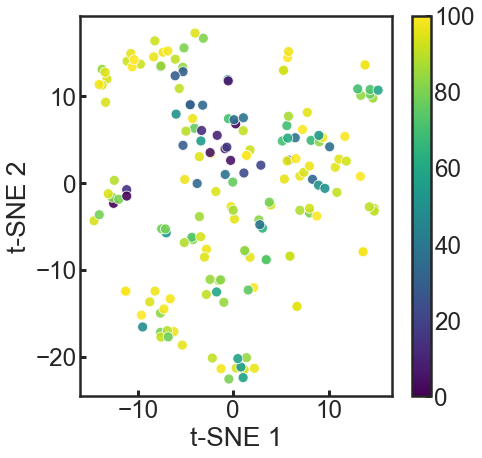

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue='rej', hue_norm=(0,100), palette='viridis', data=df_subset, s=100, alpha=0.9)

norm = plt.Normalize(0, 100)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

# for i in range(len(df_subset)):
#     plt.text(x=df_subset['tsne-2d-one'].iloc[i], y=df_subset['tsne-2d-two'].iloc[i], s=df_subset['compounds'].iloc[i], fontdict=dict(size=12), rotation=30)
# for i in range(len(df_subset)):
#     plt.text(x=df_subset['tsne-2d-one'].iloc[i], y=df_subset['tsne-2d-two'].iloc[i], s=df_subset['rej'].iloc[i], fontdict=dict(size=12), rotation=30)

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
#plt.legend(loc='upper right', frameon=False, bbox_to_anchor=(1.35,1), title='rej')
plt.show()
#fig.savefig("clustering_maccs_NF_base.pdf", bbox_inches='tight', transparent=True)

C:\Users\leesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

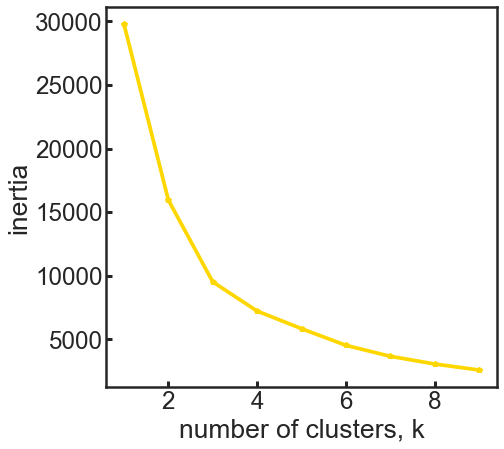

In [19]:
inertias = []
num_of_cluster = 10

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1, num_of_cluster):
    model = KMeans(n_clusters=k, random_state = 33) # 7 or 3(4)
    model.fit(tsne_results[:,:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

fig = plt.figure(figsize=(7,7))
plt.plot(range(1,num_of_cluster), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

C:\Users\leesa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


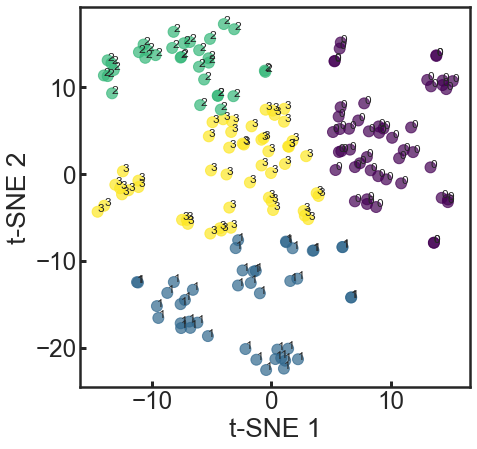

In [22]:
num_of_cluster = 4
model = KMeans(n_clusters=num_of_cluster, random_state = 33) # 7 or 3(4)
model.fit(tsne_results[:,:])

labels = model.predict(tsne_results[:,:])
fig = plt.figure(figsize=(7,7))
plt.scatter(df_subset['tsne-2d-one'], df_subset['tsne-2d-two'], c=labels, alpha=0.7, cmap='viridis', s=120) #RdBu: Darkred=0, pink=1, skyblue=2, darkblue=3
#num_of_cluster=4,  Purple 0, darkblue 1, emerald 2, yellow 3

for i in range(len(df_subset)):
    plt.text(x=df_subset['tsne-2d-one'].iloc[i], y=df_subset['tsne-2d-two'].iloc[i], s=labels[i], fontdict=dict(size=12))

plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# plt.xlim(-30,30)
# plt.ylim(-20,30)
plt.show()
#fig.savefig("clustering_maccs_NF_base_labels.pdf", bbox_inches='tight', transparent=True)

In [20]:
df_labels = pd.concat([pd.DataFrame(labels), df_subset['compounds'], df_subset['rej']], axis=1)
df_labels.columns = ['cluster_label', 'compounds', 'rej']

In [21]:
df_labels.dropna(inplace=True)

In [22]:
df_rej = pd.read_csv('compound_rejections_3.csv', encoding='windows-1252')

df_rej['Types of contaminants'] = df_rej['Types of contaminants'].str.lower()
df_rej['Types of contaminants'] = df_rej['Types of contaminants'].str.replace(' ', '')
df_rej['Types of contaminants'] = df_rej['Types of contaminants'].str.replace('-', '')

In [23]:
df_rej.drop(labels=['ID', 'Type of MB', 'Compound abbreviation', 'pH', 'MB MWCO (Da)', 'MB contact angle', 'removal rate (%)', 
                    'Measurement time (min)', 'Pressure (kPa)', 'Initial concentration of compound (mg/L)', 'MB zeta potential',
                    'compound size (nm)', 'Total charge', 'reference', 'MWCO ref', 'MB contact angle ref', 'MB zeta potential ref'], axis=1, inplace=True)
# 'Compound Mw (g/mol)', 'Compound charge', 'Compound Kow', 'min projection (A)', 'max projection (A)'

In [24]:
df_mol_prop = pd.read_csv('new_list_2.csv')
df_mol_propp = pd.read_csv('new_list_2_CPSA.csv')

In [25]:
df_mol_prop_2 = pd.DataFrame([df_rej['Types of contaminants'], df_rej['Compound Mw (g/mol)'], df_rej['Compound charge'], df_rej['Compound Kow'], df_rej['min projection (A)'], df_rej['max projection (A)']])
df_mol_prop_2 = df_mol_prop_2.T

In [26]:
df_fin = pd.DataFrame()

for i in range(len(df_mol_prop)):
    c = df_mol_prop['compound'].iloc[i]
    for j in range(len(df_mol_prop_2)):
        if c == df_mol_prop_2['Types of contaminants'].iloc[j]:
            result = pd.concat([df_mol_prop.iloc[i, 1:], df_mol_prop_2.iloc[j, 1:]], axis=0)
            df_result = pd.DataFrame(result)
            transposed = df_result.T
            df_fin = pd.concat([df_fin, transposed], axis = 0)

df_fin.reset_index(drop=True, inplace=True)

In [27]:
df_fin_2 = df_fin.drop_duplicates(subset=['compound'], keep='first')

In [28]:
df_fin_2 = df_fin_2.reset_index(drop=True)
df_mol_propp = df_mol_propp.reset_index(drop=True)

In [29]:
df_fin_2 = pd.concat([df_fin_2, df_mol_propp['dipole moment (debye)'], df_mol_propp['FNSA']], axis=1)

In [30]:
#df_labels.dropna(inplace=True)

In [45]:
df_fin_2.iloc[10]

compound                                   atrazine
SMILES                   CCNC1=NC(=NC(=N1)Cl)NC(C)C
Compound Mw (g/mol)                          215.69
Compound charge                                 0.0
Compound Kow                                  2.198
min projection (A)                             4.79
max projection (A)                             6.36
dipole moment (debye)                      3.112838
FNSA                                       0.818807
Name: 10, dtype: object

In [32]:
df_temp = np.zeros((len(df_labels), 8+3))
df_temp = pd.DataFrame(df_temp)

for i in range(len(df_fin_2)):
    c = df_fin_2['compound'].iloc[i]
    for j in range(len(df_labels)):
        if c == df_labels['compounds'].iloc[j]:
            result = pd.concat([df_fin_2.iloc[i, 1:], df_labels.iloc[j]], axis=0)
            df_result = pd.DataFrame(result)
            transposed = df_result.T
            df_temp.iloc[j] = transposed.iloc[0]

df_temp.reset_index(drop=True, inplace=True)
df_temp.columns = transposed.columns

In [32]:
#df_temp['cluster_label'] = df_labels

In [33]:
#df_temp.to_csv('df_clustering_labels.csv')

In [33]:
for i in range(num_of_cluster):
    df_temp_2 = pd.DataFrame()
    label = i
    for j in range(len(df_temp)):
        if label == df_temp['cluster_label'].iloc[j]:
            df_temp_2 = pd.concat([df_temp_2, df_temp.iloc[j]], axis=1)
    df_temp_2 = pd.DataFrame(df_temp_2)
    df_temp_2 = df_temp_2.T        
    
    print('mean', np.mean(df_temp_2.iloc[:, 1:11]))
    print('std', np.std(df_temp_2.iloc[:, 1:11]))
    print('median', np.median(df_temp_2.iloc[:, 10]))

mean Compound Mw (g/mol)      271.905760
Compound charge           -0.243812
Compound Kow               2.920640
min projection (A)         4.392400
max projection (A)         6.712800
dipole moment (debye)      3.513280
FNSA                       0.787965
cluster_label              0.000000
rej                       80.693702
dtype: float64
std Compound Mw (g/mol)      160.814814
Compound charge            0.687187
Compound Kow               1.369953
min projection (A)         1.298733
max projection (A)         2.068927
dipole moment (debye)      2.037316
FNSA                       0.203147
cluster_label              0.000000
rej                       22.839091
dtype: float64
median 91.10595321655273
mean Compound Mw (g/mol)      274.079364
Compound charge           -0.028520
Compound Kow               1.306545
min projection (A)         4.799773
max projection (A)         6.744318
dipole moment (debye)      3.323046
FNSA                       0.807682
cluster_label              1.00

C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\leesa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

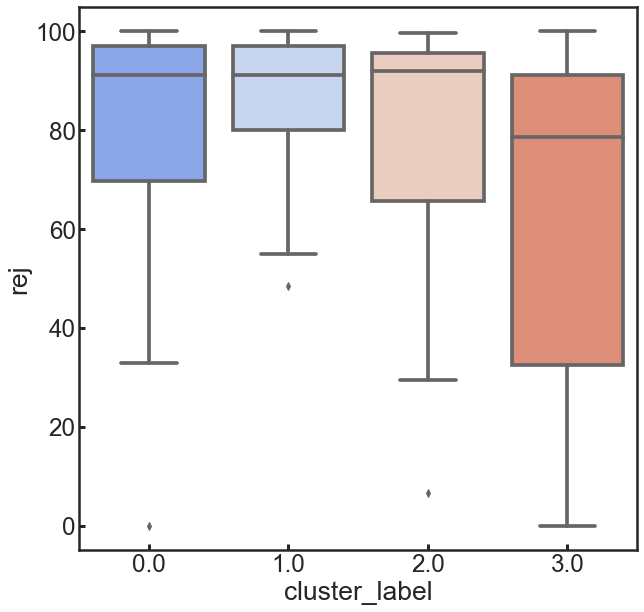

In [34]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x=df_temp['cluster_label'], y=df_temp['rej'], palette='coolwarm')#, hue=df_temp['Compound Mw (g/mol)'])
plt.show()
#fig.savefig("sqrt_clustering_maccs_rej_mean.pdf", bbox_inches='tight', transparent=True)

In [162]:
label_num = 3

df_sorted = pd.DataFrame()
for i in range(len(df_temp)):
    if label_num == df_temp['cluster_label'].iloc[i]:
        df_sorted = pd.concat([df_sorted, df_temp.iloc[i]], axis=1, ignore_index=True)
df_sorted = df_sorted.T

In [64]:
#df_sorted = df_sorted[df_sorted['rej (%)'] <= 63]

In [65]:
#df_sorted = df_sorted.drop_duplicates(subset=['Types of contaminants'], keep='first')

In [105]:
df_sorted = df_sorted.drop(8)

In [70]:
df_sorted.sort_values(by=['rej'])

SMILES Compound Mw (g/mol)  \
7                             C1=C(C=C(C=C1O)O)C(=O)O             154.121   
24               C1=CC=C(C=C1)COC(=O)C2=CC=C(C=C2)O               228.247   
43                       Oc1cc(Cl)ccc1Oc1ccc(Cl)cc1Cl              289.54   
2                                           Oc1ccccc1              94.113   
27                            CCCOC(=O)C1=CC=C(C=C1)O             180.203   
26                             CCOC(=O)C1=CC=C(C=C1)O             166.176   
11                                    Oc1ccc(Cl)cc1Cl               163.0   
40             CC12CCC3C(C1CC(C2O)O)CCC4=C3C=CC(=C4)O             288.387   
49                        C1=CC=C(C=C1)C2=CC=C(C=C2)O             170.211   
1                                       Oc1ccc(Cl)cc1              128.56   
21                      CC(C)(c1ccc(O)cc1)c1ccc(O)cc1             228.291   
39              CC12CCC3C(=CCC4=C3C=CC(=C4)O)C1CCC2=O             268.356   
48                                    Oc1ccc2ccccc2c1             144.173   
37  C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@H]2O)CCC4=C3C...             272.388   
19                CC12CCC3C(C1CCC2O)CCC4=C3C=CC(=C4)O               272.4   
29                        CCOC(=O)C1=CC=CC=C1C(=O)OCC              222.24   
9                              C1=CC(=C(C(=C1)Cl)Cl)O               163.0   
22               CC12CCC3C(C1CCC2=O)CCC4=C3C=CC(=C4)O             270.372   
0            CC12CCC3C(C1CCC2(C#C)O)CCC4=C3C=CC(=C4)O              296.41   
38            CCC(=C(CC)C1=CC=C(C=C1)O)C2=CC=C(C=C2)O             268.356   
28                             COC(=O)c1ccccc1C(=O)OC             194.186   
31                     CC(C)NCC(O)COc1ccc(CC(N)=O)cc1             266.341   
16                        COCCc1ccc(OCC(O)CNC(C)C)cc1             267.369   
15                   CC(C)NCC(COC1=CC=CC2=CC=CC=C21)O             259.349   
14                    Cc1ccc(C)c(OCCCC(C)(C)C(=O)O)c1             250.338   
33                    C1=CC=C2C=C(C=CC2=C1)S(=O)(=O)O             206.285   
42                          CCOC(=O)C1=CC=CC=C1C(=O)O             180.159   
12                         CC(C)(Oc1ccc(Cl)cc1)C(=O)O              214.65   
23                CC(C1=CC(=CC=C1)OC2=CC=CC=C2)C(=O)O             242.274   
32        C1=CC2=C(C=CC=C2S(=O)(=O)O)C(=C1)S(=O)(=O)O              288.29   
3                          CC1=C(C=CC(=C1)Cl)OCC(=O)O              200.62   
4                       CC1=C(C=CC(=C1)Cl)OC(C)C(=O)O              214.65   
34                            CCCCCCCCCC1=CC=C(C=C1)O             220.356   
20                            C1=CC(=C(C=C1O)O)C(=O)O             154.121   
25            CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O             254.285   
13                   COc1ccc2cc([C@H](C)C(=O)O)ccc2c1             230.263   
41                 COC1=CC(=C(C=C1)C(=O)C2=CC=CC=C2)O             228.247   
46  CCN(CC)C1=CC=C(C=C1)C(=C2C=CC(=[N+](CC)CC)C=C2...              566.66   
6     CC12CCC(=O)C=C1CCC3C2C(CC4(C3CCC4(C(=O)CO)O)C)O             362.466   
10                   C1(=C(C(=C(C(=C1Cl)Cl)Cl)Cl)Cl)O              266.32   
17  CC[C@@H]1[C@@]([C@@H]([C@H](C(=O)[C@@H](C[C@@]...             733.937   
18  CC[C@H]1OC(=O)[C@H](C)[C@@H](OC2CC(C)(OC)C(O)C...             837.058   
5   CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...             392.467   
35                               C1=CC(=CC=C1C(=O)O)O              138.12   
45  C1=CC=C(C(=C1)C2=C3C=C(C(=O)C(=C3OC4=C(C(=C(C=...             670.884   
36                             CC1=CC(=C(C=C1)C(C)C)O             150.221   
30                       CCCCOC(=O)c1ccccc1C(=O)OCCCC             278.348   
44  C1=CC=C2C(=C1)C(=CC(=C2N)N=NC3=CC=C(C=C3)C4=CC...              696.66   
47       CC(C)(Oc1ccc(CCNC(=O)c2ccc(Cl)cc2)cc1)C(=O)O              361.82   

   Compound charge Compound Kow min projection (A) max projection (A)  \
7          -1.0085        1.024               3.89               4.81   
24         -0.0309        3.398               4.11

In [69]:
# https://stackoverflow.com/questions/16183462/saving-images-in-python-at-a-very-high-quality

fig = plt.figure(figsize=(40,40), dpi=800) #dpi=1200)

for i in range(len(df_sorted)):
    m = Chem.MolFromSmiles(df_sorted['SMILES'].iloc[i])
    Draw.MolToFile(m,'mol.png', size=(300, 300))
#     Draw.MolToFile(m, 'mol.svg', size=(600, 600))
#     cairosvg.svg2png(url='mol.svg', write_to='mo.png')
#     img = Image.open('mol.svg')
    img = mpimg.imread('mol.png')
    #print(img)
    ax = fig.add_subplot(13,4,i+1)
    ax.imshow(img)
    ax.set_title([df_sorted['compounds'].iloc[i], df_sorted['rej'].iloc[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)  
plt.show()

fig.savefig("report_lab_0_sorted.pdf", bbox_inches='tight', transparent=True)#, dpi='figure')

meta NOT subset; don't know how to subset; dropped


In [93]:
df_sorted['rej'] = df_sorted['rej'].values.astype(float)
df_sorted['FNSA'] = df_sorted['FNSA'].values.astype(float)

In [94]:
df_sorted['rej'] = df_sorted['rej'].round(2)
df_sorted['FNSA'] = df_sorted['FNSA'].round(2)

In [95]:
df_sorted = df_sorted.sort_values(by='rej', axis=0, ascending=True)

In [96]:
df_sorted

SMILES Compound Mw (g/mol)  \
2                                                 C=O              30.026   
4                                                  CO              32.042   
46                                                CCO              46.069   
49                                           CCC(=O)C              72.107   
31                                             CCOCCO              90.122   
..                                                ...                 ...   
42  OC[C@H]1O[C@H](O[C@]2(CO)O[C@H](CO)[C@@H](O)[C...             342.297   
56                                            OCCCCCO             104.149   
27  CC[C@H]1OC(=O)[C@H](C)[C@@H](OC2CC(C)(OC)C(O)C...             837.058   
10  CC1CC2C3CCC4=CC(=O)C=CC4(C3(C(CC2(C1(C(=O)CO)O...             392.467   
57             OC[C@@H](O)[C@@H](O)[C@H](O)[C@H](O)CO             182.172   

   Compound charge Compound Kow min projection (A) max projection (A)  \
2              0.0       -0.467               2.08               2.34   
4              0.0       -0.519                2.2               2.62   
46             0.0       -0.162               2.39               3.23   
49             0.0        0.807               2.77                4.0   
31             0.0       -0.209               2.75               5.07   
..             ...          ...                ...                ...   
42             0.0       -4.529               5.29               5.84   
56             0.0       -0.187               2.89               5.67   
27          0.9918          3.0               9.12              10.83   
10             0.0        1.682               4.86               7.43   
57             0.0        -3.73               3.54               5.39   

   dipole moment (debye)  FNSA cluster_label         compounds    rej  
2               2.614124  0.41           3.0      formaldehyde  10.50  
4               1.403854  0.42           3.0          methanol  10.57  
46              1.495427  0.74           3.0           ethanol  26.71  
49              3.117524  0.81           3.0  methylethylketon  29.25  
31              0.467815  0.55           3.0    2ethoxyethanol  29.54  
..                   ...   ...           ...               ...    ...  
42              4.860687  0.68           3.0           sucrose  98.34  
56              0.535468  0.70           3.0    1,5pentanediol  98.70  
27              6.278526  0.70           3.0     roxithromycin  98.74  
10               2.12889  0.91           3.0     dexamethasone  99.16  
57              0.903445  0.71           3.0          mannitol  99.70  

[62 rows x 11 columns]

In [1]:
fig = plt.figure(figsize=(30,30), dpi=600) #dpi=1200)

for i in range(len(df_sorted)):
    m = Chem.MolFromSmiles(df_sorted['SMILES'].iloc[i])
    AllChem.ComputeGasteigerCharges(m)
    contribs = [m.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(m.GetNumAtoms())]
    a = SimilarityMaps.GetSimilarityMapFromWeights(m, contribs, contourLines=10)#, draw2d=d2d)
    a.savefig('mol_charge.png', dpi='figure', bbox_inches='tight', transparent=True)

    img = mpimg.imread('mol_charge.png')
    ax = fig.add_subplot(10,7,i+1)
    ax.imshow(img)
    ax.set_title([df_sorted['compounds'].iloc[i], df_sorted['rej'].iloc[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

fig.savefig("report_lab_3_120322.pdf", bbox_inches='tight', transparent=True)#, dpi='figure')

In [86]:
df_1

Type of MB    Types of contaminants   pH  MB MWCO (Da)  MB contact angle  \
0            AK  2(2butoxyethoxy)ethanol  7.0           150              50.0   
1            AK              caprolactam  7.0           150              50.0   
2            AK                 creatine  7.0           150              50.0   
3            AK             formaldehyde  7.0           150              50.0   
4            AK              isopropanol  7.0           150              50.0   
...         ...                      ...  ...           ...               ...   
1886        XLE                     mcpa  7.0            96              75.8   
1887        XLE                 mecoprop  7.0            96              75.8   
1888        XLE                 mecoprop  7.0            96              75.8   
1889        XLE                 mecoprop  7.0            96              75.8   
1890        XLE                 mecoprop  7.0            96              75.8   

      Pressure (kPa)  Measurement time (min)  \
0              800.0                    10.0   
1              800.0                    10.0   
2              800.0                    10.0   
3              800.0                    10.0   
4              800.0                    10.0   
...              ...                     ...   
1886          1000.0                    10.0   
1887          1000.0                    10.0   
1888          1000.0                    10.0   
1889          1000.0                    10.0   
1890          1000.0                    10.0   

      Initial concentration of compound (mg/L)  removal rate (%)  1  ...  158  \
0                                      0.16223            81.590  0  ...    1   
1                                      0.11316            82.850  0  ...    0   
2                                      0.13114            96.650  0  ...    1   
3                                      0.03003             3.350  0  ...    0   
4                                      0.06010            65.270  0  ...    1   
...                                        ...               ... ..  ...  ...   
1886                                  10.00000            93.587  0  ...    1   
1887                                   0.00100            95.012  0  ...    1   
1888                                   1.00000            93.349  0  ...    1   
1889                                   5.00000            92.874  0  ...    1   
1890                                  10.00000            93.349  0  ...    1   

      159  160  161  162  163  164  165  166  167  
0       0    1    1    0    0    0    1    0    0  
1       1    0    0    1    0    0    1    1    0  
2       1    1    1    1    0    0    1    0    0  
3       0    0    0    0    0    0    1    0    0  
4       0    0    1    0    0    0    1    0    0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  
1886    0    1    1    0    1    1    1    1    0  
1887    0    1    1    0    1    1    1    1    0  
1888    0    1    1    0    1    1    1    1    0  
1889    0    1    1    0    1    1    1    1    0  
1890    0    1    1    0    1    1    1    1    0  

[700 rows x 176 columns]

In [163]:
fp_temp = pd.read_csv('output_test_3_MACCS.csv', header=None)

In [164]:
fp_temp

0    1    2    3    4    5    6    7    8    9    \
0    2(2butoxyethoxy)ethanol    0    0    0    0    0    0    0    0    0   
1                caprolactam    0    0    0    0    0    0    0    0    0   
2                   creatine    0    0    0    0    0    0    0    0    0   
3               formaldehyde    0    0    0    0    0    0    0    0    0   
4                isopropanol    0    0    0    0    0    0    0    0    0   
..                       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
225               ampicillin    0    0    0    0    0    0    0    0    1   
226        cephalexinhydrate    0    0    0    0    0    0    0    0    1   
227                diltiazem    0    0    0    0    0    0    0    0    0   
228             erythromycin    0    0    0    0    0    0    0    0    0   
229            roxithromycin    0    0    0    0    0    0    0    0    0   

     ...  158  159  160  161  162  163  164  165  166  167  
0    ...    1    0    1    1    0    0    0    1    0    0  
1    ...    0    1    0    0    1    0    0    1    1    0  
2    ...    1    1    1    1    1    0    0    1    0    0  
3    ...    0    0    0    0    0    0    0    1    0    0  
4    ...    1    0    0    1    0    0    0    1    0    0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
225  ...    1    1    1    1    1    1    1    1    1    0  
226  ...    1    1    1    1    1    1    1    1    1    1  
227  ...    1    1    1    1    1    1    1    1    1    0  
228  ...    1    1    1    1    1    0    1    1    1    0  
229  ...    1    1    1    1    1    0    1    1    1    0  

[230 rows x 168 columns]

In [165]:
new_df = pd.DataFrame()
for i in range(len(df_sorted)):
    name = df_sorted['compounds'].iloc[i]
    for j in range(len(fp_temp)):
        if name == fp_temp.iloc[j][0]:
            a = pd.concat([df_sorted.iloc[i], fp_temp.iloc[j][1:]])
    new_df = pd.concat([new_df, a], axis=1)
new_df = new_df.T

In [166]:
new_df

SMILES Compound Mw (g/mol)  \
0                             CN(CC(=O)O)C(=N)N             131.135   
0                                           C=O              30.026   
0                                        CC(C)O              60.096   
0                                            CO              32.042   
0                                       NC(N)=O              60.056   
0                         CC(=O)NC1=CC=C(C=C1)O             151.165   
0                  NC(=O)N1c2ccccc2C=Cc2ccccc21             236.274   
0                O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl              296.15   
0                    CC(C)Cc1ccc(C(C)C(=O)O)cc1             206.285   
0                   C1=CC(=C(C(=C1)Cl)C(=O)N)Cl              190.02   
0                                   N#Cc1ccccc1             103.124   
0                             CC1=CC=C(C=C1)C=O             120.151   
0                        CC(=O)/C=C/C1=CC=CC=C1             146.189   
0                 CC1=C(C=C(C=C1)O)[N+](=O)[O-]             153.137   
0              C1=CC(=C(C=C1C=O)[N+](=O)[O-])Cl              184.99   
0                                       CC(=O)O              60.052   
0                  C1=CC=C(C(=C1)[N+](=O)[O-])O              139.11   
0                    C1=CC(=CC=C1[N+](=O)[O-])O              139.11   
0         O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1             184.107   
0                                     Nc1ccccc1              93.129   
0  O=C(NC(CO)C(O)c1ccc([N+](=O)[O-])cc1)C(Cl)Cl              323.13   
0  CN/C(=C\[N+](=O)[O-])/NCCSCC1=CSC(=N1)CN(C)C              331.45   
0                      C1=CC=C2C(=C1)C=CC(=O)N2             203.341   
0                   CC1=NC=C(N1CCO)[N+](=O)[O-]             171.156   
0                       CCOC1=CC=C(C=C1)NC(=O)C             179.219   
0                    C1=CC2=C3C(=C1)C=CC3=CC=C2             152.196   
0                 C1=CC=C2C(=C1)C=CC3=CC=CC=C32             178.234   
0                    c1cc2ccc3cccc4ccc(c1)c2c34             202.256   
0    CC(=O)NC1=C(C(=C(C(=C1I)C(=O)O)I)NC(=O)C)I             613.916   
0                                     ClC(Cl)Cl              119.37   
0                               C(Br)(Br)(Br)Br             331.627   
0                               C(Cl)(Cl)(Cl)Cl              153.81   
0                             C(=C(Cl)Cl)(Cl)Cl              165.82   
0                         C1=CC(=NC(=C1)Br)NN                  61.8   
0                        C1=CC=C(C=C1)C=CC(=O)O             148.161   
0                        CC(=O)NC1=CC=C(C=C1)OC             165.192   
0        CC(=O)N[C@@H](CC1=CC=C(C=C1)O)C(=O)O               223.228   
0                  CON(C)C(=O)Nc1ccc(Cl)c(Cl)c1              249.09   
0              C1(C(C(C(C(C1Cl)Cl)Cl)Cl)Cl)Cl                290.81   
0                                    CC(C)(C)OC               88.15   
0                 CC1=C(C=C(C=C1)NC(=O)N(C)C)Cl              212.68   
0                   CN(C)C(=O)Nc1ccc(Cl)c(Cl)c1              233.09   
0                    CC(C)c1ccc(NC(=O)N(C)C)cc1             206.289   
0                   CN(C(=O)NC1=CC=C(C=C1)Br)OC             259.103   
0                   CN(C(=O)NC1=CC=C(C=C1)Cl)OC              214.65   
0                CN(C)C(=O)NC1=CC(=C(C=C1)OC)Cl              228.68   
0                                O=C(O)c1ccccc1             122.123   
0                             CC(C(=C)C(=O)OC)O             116.116   
0                          O=[N+]([O-])c1ccccc1             123.111   
0                             C1=CC2=NNN=C2C=C1             119.127   
0           CC1=C(C(=CC=C1)NC2=CC=CC=C2C(=O)O)C              241.29   
0                            CC(=O)NC(CS)C(=O)O             201.225   

  Compound charge Compound Kow min projection (A) max projection (A)  \
0             0.0       -2.864               3.35               4.36   
0             0.0       -0.467               2.08               2.34   
0             0.0        0.255               2.95            

In [167]:
b = new_df.iloc[:, 11:]

In [168]:
b.to_csv('testing_lab3.csv')

In [4]:
frequency_df = pd.read_csv('clustering_bar_count.csv')

In [4]:
frequency_df

Cluster 0   Cluster 1   Cluster 2  Cluster 3
0  100.000000  100.000000  100.000000  76.923077
1  100.000000  100.000000   90.322581  75.000000
2  100.000000  100.000000   90.322581  73.076923
3   91.836735  100.000000   83.870968  71.153846
4   91.836735  100.000000   83.870968  63.461538
5   87.755102  100.000000   83.870968  61.538462
6   83.673469   88.636364   80.645161  57.692308
7   81.632653   88.636364   77.419355  57.692308
8   81.632653   88.636364   74.193548  51.923077
9   81.632653   81.818182   64.516129  51.923077

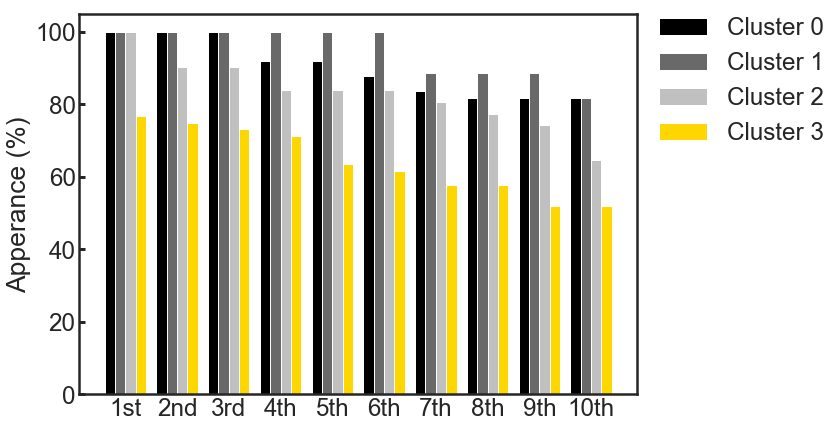

meta NOT subset; don't know how to subset; dropped


In [9]:
x = np.arange(len(frequency_df))  # the label locations
width = 0.2  # the width of the bars
labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

fig = plt.figure(figsize=(10,7))
plt.bar(x-0.3, frequency_df['Cluster 0'], width, color='black')
plt.bar(x-0.1, frequency_df['Cluster 1'], width, color='dimgrey')
plt.bar(x+0.1, frequency_df['Cluster 2'], width, color='silver')
plt.bar(x+0.3, frequency_df['Cluster 3'], width, color='gold')
plt.xticks(x, labels)
#plt.xlabel("Teams")
plt.ylabel("Apperance (%)")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], bbox_to_anchor=(1.00, 1.05), frameon=False)
plt.show()

fig.savefig("clustering_bar_count.pdf", bbox_inches='tight', transparent=True)#, dpi='figure')

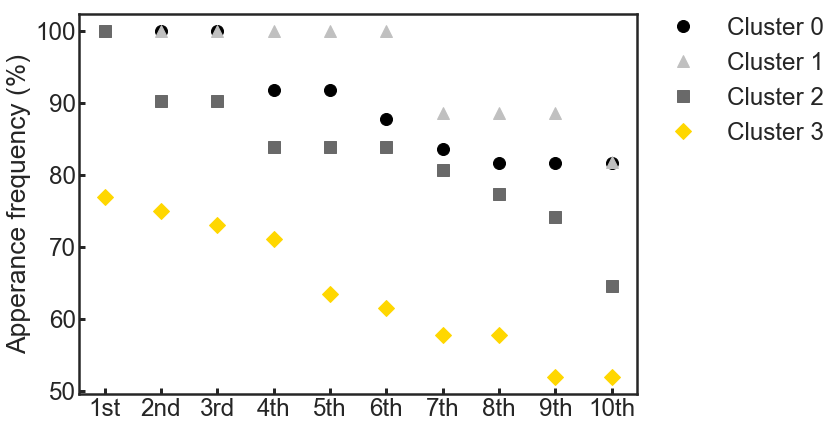

meta NOT subset; don't know how to subset; dropped


In [7]:
x = np.arange(len(frequency_df))  # the label locations
labels = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th', '10th']

fig = plt.figure(figsize=(10,7))
plt.plot(x, frequency_df['Cluster 0'], color='black', marker='o', linestyle='none', linewidth=2, markersize=12)
plt.plot(x, frequency_df['Cluster 1'], color='silver', marker='^', linestyle='none', linewidth=2, markersize=12)
plt.plot(x, frequency_df['Cluster 2'], color='dimgrey', marker='s', linestyle='none', linewidth=2, markersize=12)
plt.plot(x, frequency_df['Cluster 3'], color='gold', marker='D', linestyle='none', linewidth=2, markersize=12)
plt.xticks(x, labels)
plt.ylabel("Apperance frequency (%)")
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"], bbox_to_anchor=(1.00, 1.05), frameon=False)
plt.show()

fig.savefig("clustering_line_count.pdf", bbox_inches='tight', transparent=True)#, dpi='figure')